In [ ]:
import numpy as np
import cv2 
import PIL.Image as Image
import os 
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
IMAGE_SHAPE = (224,224)
classifier = tf.keras.Sequential([
                                  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4" , input_shape = IMAGE_SHAPE+(3,)) ,  #3 is for rgb  channel
                                  
])

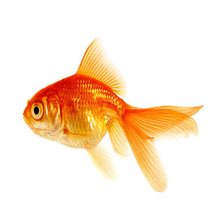

In [ ]:
gold_fish = Image.open('goldfish.jpg').resize(IMAGE_SHAPE)
gold_fish

In [ ]:
#First we need to normalize or scale the image by dividing by 255 
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [ ]:
gold_fish

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [ ]:
gold_fish[np.newaxis , ...].shape

(1, 224, 224, 3)

In [ ]:
result = classifier.predict(gold_fish[np.newaxis , ...])
result.shape

(1, 1001)

In [ ]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [ ]:
image_labels = []
with open("image_label.txt", "r") as f:
  image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [ ]:
image_labels[predicted_label_index]

'goldfish'

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos' , origin = dataset_url , cache_dir = '.' , untar = True)
data_dir 

228827136/228813984 [==============================] - 1s 0us/step


'./datasets/flower_photos'

In [ ]:
import pathlib
data_directory = pathlib.Path(data_dir)
data_directory

PosixPath('datasets/flower_photos')

In [ ]:
roses = list(data_directory.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/2735666555_01d53e74fe.jpg'),
 PosixPath('datasets/flower_photos/roses/5180896559_b8cfefc21e.jpg'),
 PosixPath('datasets/flower_photos/roses/8960904651_9a0b727258.jpg'),
 PosixPath('datasets/flower_photos/roses/4504731519_9a260b6607_n.jpg'),
 PosixPath('datasets/flower_photos/roses/1801614110_bb9fa46830.jpg')]

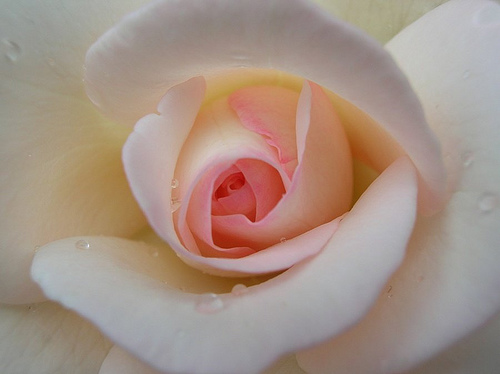

In [ ]:
Image.open(str(roses[0]))

In [ ]:
flowers_images_dict = {
    'roses':list(data_directory.glob("roses/*")),
    'daisy':list(data_directory.glob("daisy/*")),
    'dandelion':list(data_directory.glob("dandelion/*")),
    'sunflowers':list(data_directory.glob("sunflowers/*")),
    'tulips':list(data_directory.glob("tulips/*")),
}

In [ ]:
flowers_labels_dict = {
    'roses':0 , 
    'daisy':1 , 
    'dandelion':2 , 
    'sunflowers':3 , 
    'tulips':4 ,
}

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0])) #The imread function of openCV module is used to read image file and convert it to an numpy array
img.shape

(374, 500, 3)

In [ ]:
X , y = [] , []

for flower_name , images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img , IMAGE_SHAPE)
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=0)

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
predicted = classifier.predict(np.array([X[0],X[1],X[2]]))
predicted = np.argmax(predicted , axis = 1)
predicted

array([795, 795, 550])

In [ ]:
image_labels[795]

'shower curtain'

In [ ]:
image_labels[550]

'envelope'

In [29]:
#creating a model which is just same as the previous model but does not include last layer by which we can use our made layer as its last layer
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model , input_shape = (224 , 224 , 3) , trainable = False
)

In [30]:
num_of_flowers = 5 
model = tf.keras.Sequential([
                             pretrained_model_without_top_layer , 
                             tf.keras.layers.Dense(num_of_flowers) 
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [31]:
model.compile(optimizer = 'adam' , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True) , metrics = ['accuracy'])
model.fit(X_train_scaled , y_train , epochs = 5)

Epoch 1/5
86/86 [==============================] - 64s 694ms/step - loss: 0.8495 - accuracy: 0.6831
Epoch 2/5
86/86 [==============================] - 61s 704ms/step - loss: 0.4242 - accuracy: 0.8572
Epoch 3/5
86/86 [==============================] - 61s 707ms/step - loss: 0.3307 - accuracy: 0.8892
Epoch 4/5
86/86 [==============================] - 60s 698ms/step - loss: 0.2715 - accuracy: 0.9142
Epoch 5/5
86/86 [==============================] - 60s 698ms/step - loss: 0.2388 - accuracy: 0.9262


In [32]:
predictions = model.predict(X_test_scaled)
predictions

array([[-4.936859  ,  4.3781543 , -1.5840396 ,  0.24721423, -3.4879873 ],
       [ 1.454474  , -1.9046812 , -6.417822  , -5.1846385 ,  1.6614516 ],
       [-3.9759855 ,  0.2755404 ,  5.896492  , -3.3164837 , -1.1233826 ],
       ...,
       [-0.18284915, -3.7949784 , -4.2843695 ,  0.4778851 , -0.32492718],
       [ 4.7642503 , -3.197183  , -6.295979  , -4.1245193 ,  3.115015  ],
       [-3.5285273 ,  0.7731614 , -1.7614988 ,  6.2648673 , -5.6481466 ]],
      dtype=float32)

In [46]:
index_of_image = np.argmax(predictions[2])
index_of_image

2

In [47]:
def getKey(val):
  for key , value in flowers_labels_dict.items():
    if val == value :
      return key

result = getKey(index_of_image)
result

'dandelion'

In [45]:
getKey(y_test[2])

'dandelion'